# Using the scikit-learn library

In [2]:
from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt
import pandas as pd

The `scikit-learn` library contains functions for generating random numeric datasets that can be used for classification or regression. The previous chapter made use of `numpy` to generate arrays of data. In this chapter, we'll find that `scikit-learn` also makes use of numpy to generate data, but its implementation is abstracted by functions that output multi-dimensional arrays with specific characteristics. We can then make use of a library called `pandas` to convert these arrays into a _dataframe_, which allows us to operate on the data as matrices.

The `datasets` module contains these handy data generation functions.

## Generating data for classification

### Using `make_blobs()`

Scikit-learn's `make_blob()` function generates random datasets of a gaussian distribution (technically a [guassian mixture](https://scikit-learn.org/stable/modules/mixture.html#:~:text=A%20Gaussian%20mixture%20model%20is,Gaussian%20distributions%20with%20unknown%20parameters)), where you can specify the number of samples (through `n_samples`) and the number of clusters (through `centers`).

In the example below, we generate 10,000 samples grouped into 4 clusters. `make_blobs()` outputs two things: the random array of features and the labels. Here we store the features in `X` and the labels in `y`.

In [174]:
# Generate 10,000 samples with 2 features and 4 possible labels
X, y = make_blobs(n_samples=10000, centers=4, n_features=2)

As mentioned earlier, `scikit-learn` utilises `numpy` under the hood. We can check that by looking at the type of the generated data in `X` and `y`.

In [175]:
print('Type of X:', type(X))
print('Type of y:', type(y))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


We can then structure X and y as a dataframe. We've specified `n_features=2` above, so `X` has two columns. We'll name the columns `a` and `b` in this example.

In [176]:
# Structure X and y as a dataframe
df = pd.DataFrame(dict(a=X[:,0],  b=X[:,1], label=y))

We can preview `df` to check its size and columns.

In [177]:
df

,a,b,label
0,-6.362177,-1.709901,3
1,-1.231056,-5.044701,0
2,-2.577123,-5.050849,0
3,6.521431,-0.878654,2
4,6.837434,-1.558478,2
...,...,...,...
9995,-10.637959,-7.965951,1
9996,-8.132289,-1.173410,3
9997,-7.100944,-1.223754,3
9998,-1.921124,-5.158667,0


To check the number of unique labels (i.e., the clusters), we can use the `unique()` function of the dataframe object. We'll see that since we've specified that there are 4 clusters, then there should 4 unique values as the data labels.

In [178]:
df['label'].unique()

array([3, 0, 2, 1])

Plotting the dataframe, we can easily make sense of the generated clusters. Here we've provided `y` as the value of the parameter `c`, which is a list of colors to assign to each cluster. By default pyplot does that for us using the size of `c` to get the number of colors to use. The `s` parameter is just the thickness of each data point on the plot.

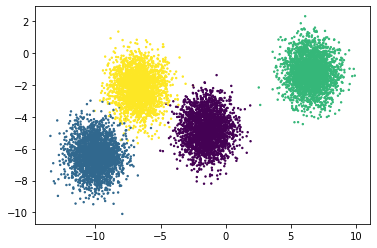

In [181]:
plt.scatter(df['a'], df['b'], c=y, s=2)

We can see that the clusters are easily linearly separable. The `make_blobs()` function is suitable for testing linear models.

We can easily add more features into the dataset by specifying the number in the `n_features` parameter. Here we reuse the code above and add 1 new feature which we'll name `c`, and then visualise the generated data in a 3D scatter plot. Notice again that the data clusters are linearly separable by a 2D plane.

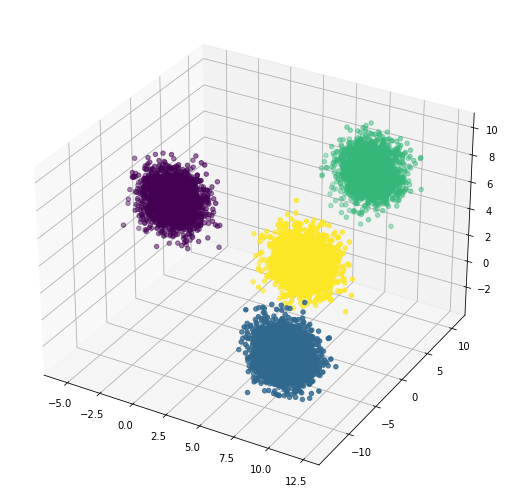

In [219]:
# 3 features and 4 possible labels
X, y = make_blobs(n_samples=10000, centers=4, n_features=3)
df = pd.DataFrame(dict(a=X[:,0],  b=X[:,1], c=X[:,2], label=y))

fig = plt.figure(figsize = (10, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['a'], df['b'], df['c'], c=y)

### A more powerful way: `make_classification()`

In [336]:
# Normal data
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           class_sep=2,
                           flip_y=0,
                           weights=[0.3,0.3,0.3],
                           random_state=13,
                          )
df = pd.DataFrame(dict(a=X[:,0], b=X[:,1],label=y))

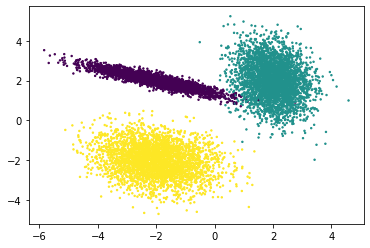

In [338]:
plt.scatter(df['a'], df['b'], c=y, s=2)

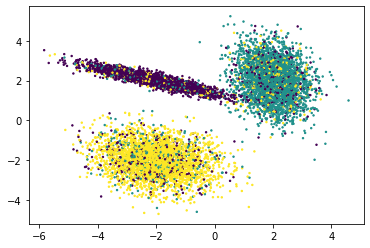

In [332]:
# Noisy data
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           class_sep=2,
                           flip_y=0.3,   # 30% noise?
                           weights=[0.3,0.3,0.3],
                           random_state=13,
                          )
df = pd.DataFrame(dict(a=X[:,0], b=X[:,1],label=y))
plt.scatter(df['a'], df['b'], c=y, s=2)

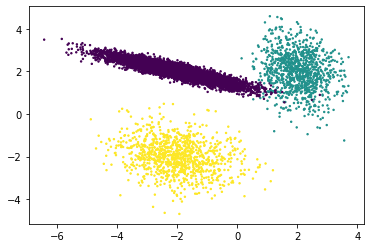

In [341]:
# Imbalanced data
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           class_sep=2,
                           flip_y=0,
                           weights=[0.8,0.1,0.1],  # one cluster is 80% of the data
                           random_state=13,
                          )
df = pd.DataFrame(dict(a=X[:,0], b=X[:,1],label=y))
plt.scatter(df['a'], df['b'], c=y, s=2)

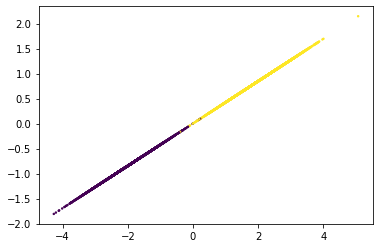

In [382]:
# Redundant data
X, y = make_classification(n_samples=10000,
                           n_features=4,
                           n_informative=1,
                           n_redundant=3,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           class_sep=2,
                           flip_y=0,
#                            weights=[0.3,0.3,0.3],
                           random_state=13,
                          )
df = pd.DataFrame(dict(a=X[:,0], b=X[:,1],label=y))
plt.scatter(df['a'], df['b'], c=y, s=2)